## Table of Content
- [Imports](#imp)
- [Objective](#obj)
- [Data Wrangling](#wra)
- [Univariate Visualizations](#uni)
- [Bivariate Visualizations](#bi)
- [Multivariate Visualizations](#mul)

### About the Dataset
The dataset contain data for only a trip from Febuary 28 2019 to March 1 2019. This dataset is about a people using rental bikes for commute to work and back home. The people can rent the bike on a pass basis or on a yearly membership basis. The dataset provides the start time, start loaction and end time, end loaction for the trips.

<a id='imp'></a>
## Imports

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
%matplotlib inline

<a id='obj'></a>
### Objective : 
- Find the frequency of trips based on time.
- I also will be focusing on other variations affecting the above and more.

<a id='wra'></a>
### Data Wrangling for future exploratory and explanatory analysis

In [101]:
bike = pd.read_csv('fordgobike-tripdata.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [102]:
bike.shape

(183412, 16)

In [103]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [104]:
# convertions to right format
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

#creating a separate columns for the trip's start hour and start minute
bike['start_time_hr'] = bike['start_time'].apply(lambda x: x.hour)
bike['start_time_min'] = bike['start_time'].apply(lambda x: x.minute)

#Conforming the changes
bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hr,start_time_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,32
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,53


In [117]:
# fetching age
bike['age'] = df['member_birth_year'].apply(lambda x: 2021 - x)
bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hr,start_time_min,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,32,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,53,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,13,49.0


In [120]:
# checking the age ranges
bike['age'].describe()

count    175147.000000
mean         36.193563
std          10.116689
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

We have members from age 20 until age 143. The age 143 could be an outlier as it wouldnt be possible for some that age to ride a bike and also to live that long.

In [243]:
# gender counts
bike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [124]:
# new dataframe for visual exploration
df = bike[['bike_id','member_gender','age','user_type','duration_sec','start_time_hr','start_time_min','start_station_id','start_station_name','end_station_id','end_station_name']]
df.head()

,bike_id,member_gender,age,user_type,duration_sec,start_time_hr,start_time_min,start_station_id,start_station_name,end_station_id,end_station_name
0,4902,Male,37.0,Customer,52185,17,32,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St
1,2535,NaN,NaN,Customer,42521,18,53,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St
2,5905,Male,49.0,Customer,61854,12,13,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St)
3,6638,Other,32.0,Subscriber,36490,17,54,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St
4,4898,Male,47.0,Subscriber,1585,23,54,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St


<a id='uni'></a>
# Univariate Visualizations

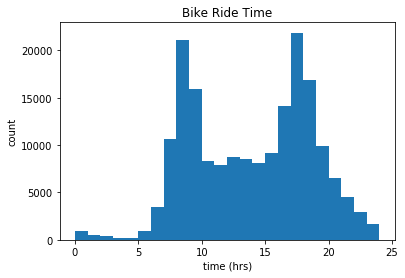

In [136]:
# visualing the time for the bike rides
bins = np.arange(0,24+1,1)
plt.hist(data=df,x='start_time_hr',bins=bins);
plt.title('Bike Ride Time')
plt.xlabel('time (hrs)')
plt.ylabel('count');

We see two peaks (bimodal). This is obvious as these two peak align with the time people go to work and get off work. So, they use the bike for commuting to work and back home.

In [151]:
df['start_station_name'].value_counts().index

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 5th St)', 'Howard St at Beale St',
       'Steuart St at Market St',
       ...
       '23rd Ave at Foothill Blvd', 'Farnam St at Fruitvale Ave',
       'Backesto Park (Jackson St at 13th St)', 'Leavenworth St at Broadway',
       'Taylor St at 9th St', 'Willow St at Vine St',
       'Parker Ave at McAllister St', 'Palm St at Willow St',
       '21st Ave at International Blvd', '16th St Depot'],
      dtype='object', length=329)

In [185]:
# fetching the top10 busy stations.
locations = ['Market St at 10th St',
           'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
           'Berry St at 4th St',
           'Montgomery St BART Station (Market St at 2nd St)',
           'Powell St BART Station (Market St at 4th St)',
           'San Francisco Ferry Building (Harry Bridges Plaza)',
           'San Francisco Caltrain (Townsend St at 4th St)',
           'Powell St BART Station (Market St at 5th St)', 
           'Howard St at Beale St',
           'Steuart St at Market St']

#making a new dataframe with the top 10 busiest locations
df_top10 = df.loc[df['start_station_name'].isin(locations)]
df_top10.sample(5)

,bike_id,member_gender,age,user_type,duration_sec,start_time_hr,start_time_min,start_station_id,start_station_name,end_station_id,end_station_name
144279,4400,Male,40.0,Subscriber,224,12,47,67.0,San Francisco Caltrain Station 2 (Townsend St...,321.0,5th St at Folsom
9347,6138,Male,42.0,Subscriber,436,7,24,67.0,San Francisco Caltrain Station 2 (Townsend St...,23.0,The Embarcadero at Steuart St
63354,5824,Male,54.0,Subscriber,391,15,14,5.0,Powell St BART Station (Market St at 5th St),78.0,Folsom St at 9th St
15403,4400,Male,51.0,Subscriber,188,9,34,16.0,Steuart St at Market St,11.0,Davis St at Jackson St
67105,6381,Other,37.0,Subscriber,673,8,11,67.0,San Francisco Caltrain Station 2 (Townsend St...,9.0,Broadway at Battery St


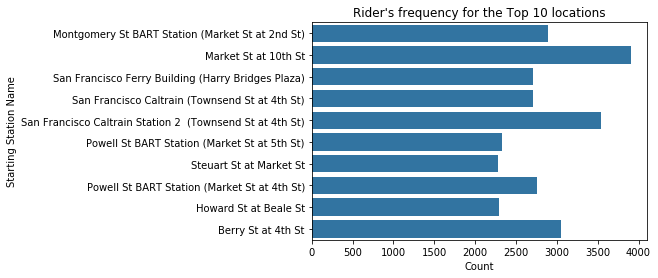

In [188]:
# Visualizing the top 10 locations frequency
base_color = sb.color_palette()[0]

sb.countplot(data=df_top10, y='start_station_name', color=base_color)
plt.xlabel('Count')
plt.ylabel('Starting Station Name')
plt.title("Rider's frequency for the Top 10 locations");

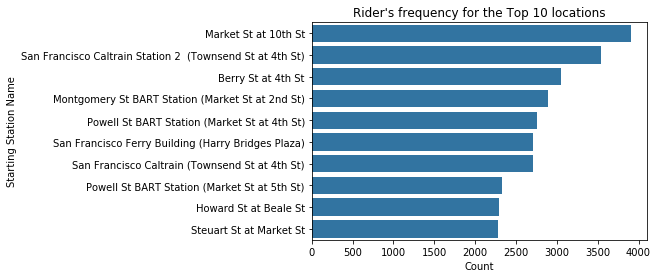

In [190]:
loc_order = df_top10.start_station_name.value_counts().index
sb.countplot(data=df_top10, y='start_station_name', color=base_color, order=loc_order)
plt.xlabel('Count')
plt.ylabel('Starting Station Name')
plt.title("Rider's frequency for the Top 10 locations");

"Market St at 10th St" is the busiest location with a riders count of close to 4000.

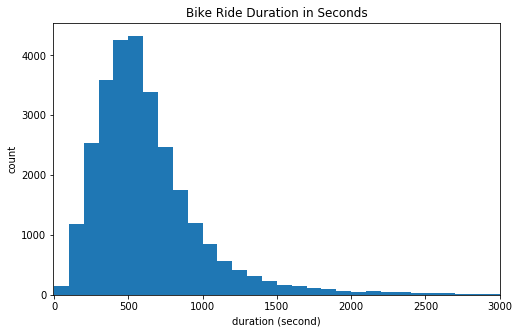

In [165]:
# Visualizing the duration of bike rides
plt.figure(figsize=[8, 5])
bins = np.arange(0,df_top10['duration_sec'].max()+1,100)
plt.hist(data=df_top10,x='duration_sec',bins=bins);
plt.xlim(-5,3000);
plt.title('Bike Ride Duration in Seconds')
plt.xlabel('duration (second)')
plt.ylabel('count');

The above plot is heavily right skewed. A better view could be if we scale the x-axis values logarithmically.

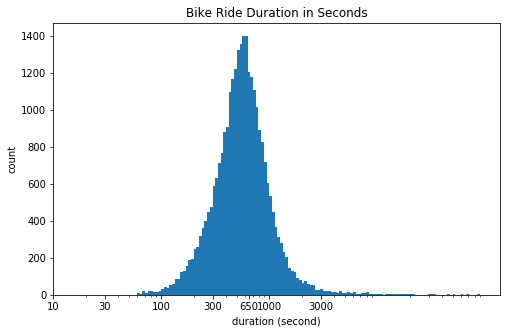

In [175]:
plt.figure(figsize=[8, 5])

log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top10['duration_sec'].max())+log_binsize, log_binsize)

plt.hist(data=df_top10,x='duration_sec',bins=bins);
plt.title('Bike Ride Duration in Seconds')
plt.xlabel('duration (second)')
plt.ylabel('count')
plt.xscale('log')
plt.xticks([10,30,100,300,650,1000,3000], [10,30,100,300,650,1000,3000]);

The peak roughly aligns with 650 value. This implies most of the ride were roughly around 11 mins. The plot is uniformly distributed

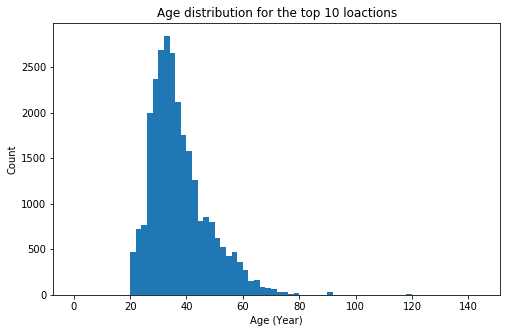

In [176]:
# Next, we create a histogram for the age of these riders. 
plt.figure(figsize=[8,5])

bins = np.arange(0, df_top10['age'].max()+2, 2)
plt.hist(data=df_top10, x='age', bins=bins)
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Age distribution for the top 10 loactions');

We see the similar trend as above. A long tail towards the right. We can use log scale for better view.

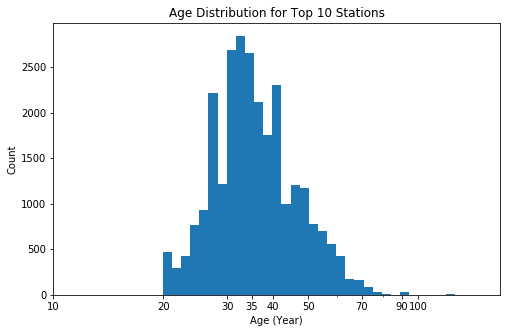

In [178]:
plt.figure(figsize=[8, 5])

log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top10['age'].max())+log_binsize, log_binsize)

plt.hist(data = df_top10, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.title('Age Distribution for Top 10 Stations')
plt.xlabel('Age (Year)')
plt.ylabel('Count');

From above plot, most of the riders are between the age of 30 to 35. We have riders above 90 years old, which look suspicious. Most probably, it could be an outlier due to a mistype.

In [179]:
df_top10.query('age > 90')

,bike_id,member_gender,age,user_type,duration_sec,start_time_hr,start_time_min,start_station_id,start_station_name,end_station_id,end_station_name
18885,5319,Male,101.0,Subscriber,432,17,48,21.0,Montgomery St BART Station (Market St at 2nd St),50.0,2nd St at Townsend St
21506,5337,Male,121.0,Customer,701,9,6,67.0,San Francisco Caltrain Station 2 (Townsend St...,9.0,Broadway at Battery St
27370,6436,Female,143.0,Customer,1474,9,28,15.0,San Francisco Ferry Building (Harry Bridges Pl...,386.0,24th St at Bartlett St
41246,5859,Male,120.0,Subscriber,539,18,46,30.0,San Francisco Caltrain (Townsend St at 4th St),25.0,Howard St at 2nd St
43259,5545,Male,101.0,Subscriber,676,16,44,21.0,Montgomery St BART Station (Market St at 2nd St),67.0,San Francisco Caltrain Station 2 (Townsend St...
97997,4908,Female,119.0,Subscriber,418,8,23,67.0,San Francisco Caltrain Station 2 (Townsend St...,26.0,1st St at Folsom St
114762,5463,Female,119.0,Subscriber,543,9,12,30.0,San Francisco Caltrain (Townsend St at 4th St),26.0,1st St at Folsom St
123240,4877,Female,119.0,Subscriber,562,9,36,30.0,San Francisco Caltrain (Townsend St at 4th St),26.0,1st St at Folsom St
137804,4617,Female,119.0,Subscriber,372,8,22,30.0,San Francisco Caltrain (Townsend St at 4th St),26.0,1st St at Folsom St
145510,5541,Female,119.0,Subscriber,508,9,34,30.0,San Francisco Caltrain (Townsend St at 4th St),26.0,1st St at Folsom St


Looks like we a few people above the 90 age range. But the research says that the longest ever lived person was 120 years old and the longest living person till date is 117 years old. So, the above age tend to weigh more towards an outlier.

In [181]:
# Removing the outliers for further visualization
# Age 101 seems valid
df_top10 = df_top10.query('age < 102')
df_top10.head()

,bike_id,member_gender,age,user_type,duration_sec,start_time_hr,start_time_min,start_station_id,start_station_name,end_station_id,end_station_name
0,4902,Male,37.0,Customer,52185,17,32,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St
38,5938,Female,29.0,Subscriber,1066,23,31,58.0,Market St at 10th St,145.0,29th St at Church St
42,5411,Male,49.0,Subscriber,1554,23,20,15.0,San Francisco Ferry Building (Harry Bridges Pl...,284.0,Yerba Buena Center for the Arts (Howard St at ...
54,5407,Female,31.0,Subscriber,401,23,30,58.0,Market St at 10th St,62.0,Victoria Manalo Draves Park
63,5731,Male,35.0,Subscriber,239,23,28,21.0,Montgomery St BART Station (Market St at 2nd St),343.0,Bryant St at 2nd St


In [184]:
# confirming the changes
df_top10.query('age > 101')

,bike_id,member_gender,age,user_type,duration_sec,start_time_hr,start_time_min,start_station_id,start_station_name,end_station_id,end_station_name


<a id='bi'></a>
# Bivariate Visualizations

In [ ]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

In [193]:
df_top10['user_type'].value_counts()

Subscriber    25411
Customer       3060
Name: user_type, dtype: int64

In [194]:
df_top10['member_gender'].value_counts()

Male      20432
Female     6128
Other       449
Name: member_gender, dtype: int64

we have two user types and three gender types. Next, convert it to categorical variable

In [196]:
nominal_var_dict = {'user_type': ['Subscriber','Customer'],
                   'member_gender': ['Male','Female','Other']}

for var in nominal_var_dict:
    var_categ = pd.api.types.CategoricalDtype(ordered=False,categories=nominal_var_dict[var])
    df_top10[var] = df_top10[var].astype(var_categ)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [199]:
# confirming the changes made
df_top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28471 entries, 0 to 183408
Data columns (total 11 columns):
bike_id               28471 non-null int64
member_gender         27009 non-null category
age                   27009 non-null float64
user_type             28471 non-null category
duration_sec          28471 non-null int64
start_time_hr         28471 non-null int64
start_time_min        28471 non-null int64
start_station_id      28471 non-null float64
start_station_name    28471 non-null object
end_station_id        28471 non-null float64
end_station_name      28471 non-null object
dtypes: category(2), float64(3), int64(4), object(2)
memory usage: 3.5+ MB


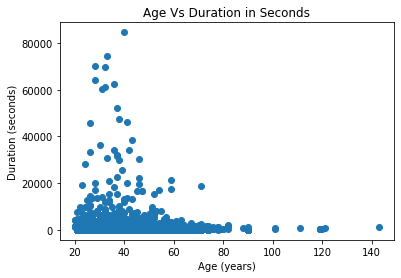

In [202]:
# visualizing age vs duration_sec
plt.scatter(data=df_top10,x='age',y='duration_sec');
plt.title('Age Vs Duration in Seconds')
plt.xlabel('Age (years)')
plt.ylabel('Duration (seconds)');

The data points looks very clustered around a certain region. We can sample the dataset to get a clearer idea of the trend

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


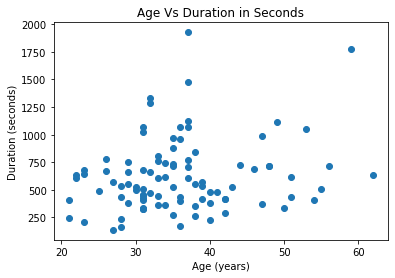

In [203]:
sample = np.random.choice(df_top10.shape[0],500,replace=False)
df_top10_sampl = df_top10.loc[sample,:]

plt.scatter(data=df_top10_sampl,x='age',y='duration_sec');
plt.title('Age Vs Duration in Seconds')
plt.xlabel('Age (years)')
plt.ylabel('Duration (seconds)');

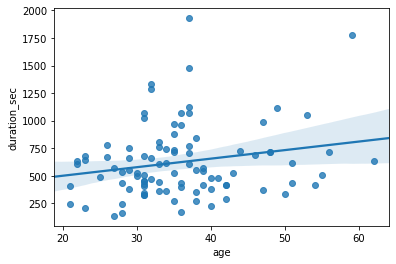

In [205]:
sb.regplot(data=df_top10_sampl,x='age',y='duration_sec');

We see a slight postive trend in the plot. The data is not uniform when it comes to age. Most of the riders are between 25 to 35 years of age.

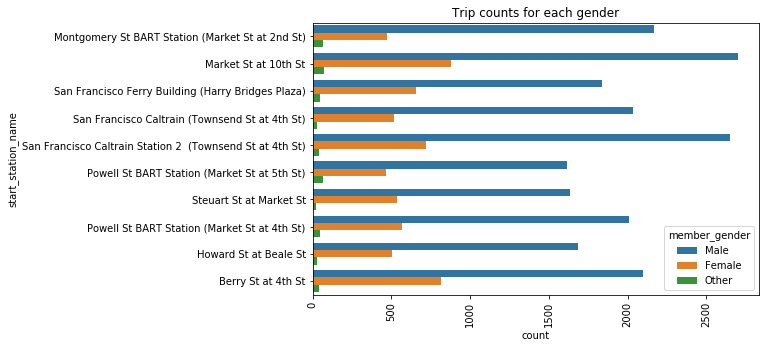

In [214]:
# plotting count for top 10 stations for each of the gender types
plt.figure(figsize=[8,5])
sb.countplot(data=df_top10,y='start_station_name',hue='member_gender')
plt.title('Trip counts for each gender')
plt.xticks(rotation=90);

From above, we see that males dominate the count. Their count is more than the other two genders combined.

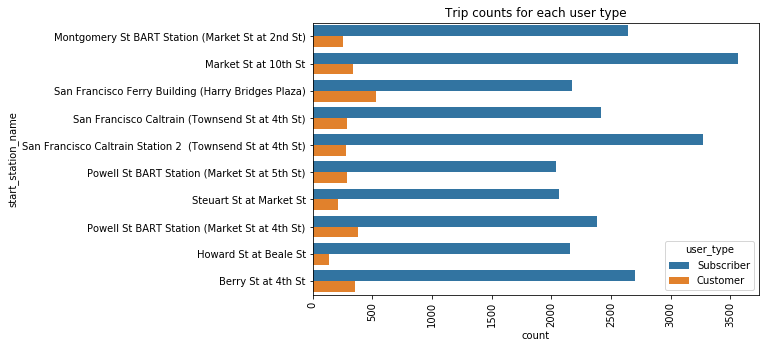

In [216]:
# plotting count for top 10 stations for each of the rider's type
plt.figure(figsize=[8,5])
sb.countplot(data=df_top10,y='start_station_name',hue='user_type')
plt.title('Trip counts for each user type')
plt.xticks(rotation=90);

The plot shows that the riders are mostly subscribers where :
    
- Customer = 24-hour pass or 3-day pass user
- Subscriber = Annual Member

Our first plot from univariate showed two peaks around the daily work time. And seeing the riders are mostly subscribers makes sense as these people need to use these bike on a day to day basis to commute to work and back home, and subscibing to the bike share application would be a cheaper option rather than using it on a pass basis.

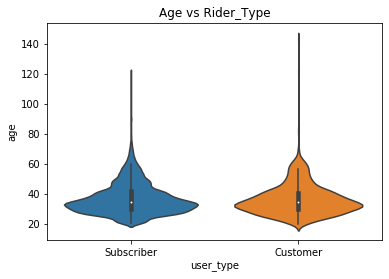

In [220]:
# looking at the age of our members
sb.violinplot(data=df_top10,x='user_type',y='age');
plt.title('Age vs Rider_Type');

The two violin plots looks almost identical with almost same median. Customers tend to have a bit more outlier.

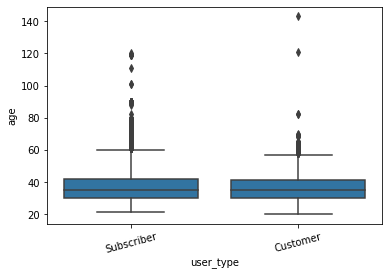

In [222]:
sb.boxplot(data=df_top10,x='user_type',y='age', color=base_color);
plt.xticks(rotation = 15);

Not much difference

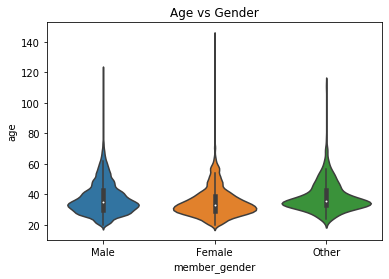

In [225]:
# looking at the age vs member's gender
sb.violinplot(data=df_top10,x='member_gender',y='age');
plt.title('Age vs Gender');

we see uniformity in all the three genders in comparison to each other.

<a id='mul'></a>
# Multivariate Visualizations

Text(0.5, 1.0, 'Trip Count for each gender type based on their user type')

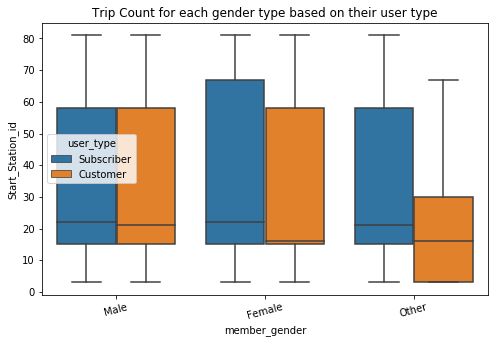

In [232]:
plt.figure(figsize=[8,5])
sb.boxplot(data=df_top10,x='member_gender',y='start_station_id',hue='user_type')
plt.xticks(rotation=15)
plt.ylabel('Start_Station_id')
plt.title('Trip Count for each gender type based on their user type')

For male, it makes no difference, whether the rider is a subscriber or customer. For female and other gender type, they tend to favor the subscibe option more

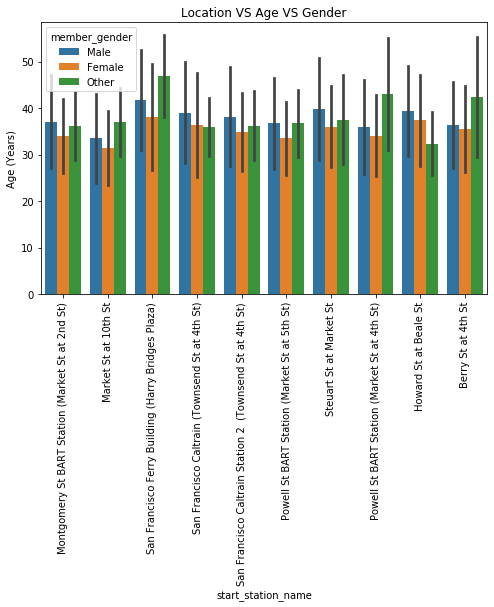

In [237]:
plt.figure(figsize=[8,5])
sb.barplot(data=df_top10,x='start_station_name',y='age',hue='member_gender',ci='sd')
plt.xticks(rotation=90)
plt.title('Location VS Age VS Gender')
plt.ylabel('Age (Years)');

The age tend to be uniform for all the three genders between the range of 30 to 40 years old.

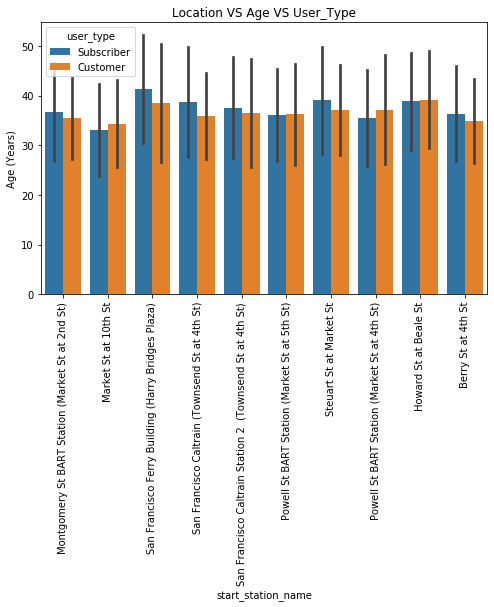

In [241]:
plt.figure(figsize=[8,5])
sb.barplot(data=df_top10,x='start_station_name',y='age',hue='user_type',ci='sd')
plt.xticks(rotation=90)
plt.title('Location VS Age VS User_Type')
plt.ylabel('Age (Years)');

The age is once again uniform between both the user types and lie between 30 to 40 years old. Thus, showing that majority of our riders are btween the age of 30 to 40.

# Take Away

- The rides tend to be more focused on the office hours.
- Majority of these rider come under the subscribe option. This option could provides riders with discounts and other perks which is the case in most of the businesses.
- Since, most of these riders are office goers, the majority of the ages range between 30 to 40 years of age
- There isnt any significant difference between male and female in terms of their riding frequency or in terms of their age. Further investiation with newer features could bring out significant difference between the two.
- The data explored was just for two days. More insights can be achived with longer period of data.